In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Input data

data = pd.read_csv('advertising.csv', header=0)
m = data.shape[0]
n = data.shape[1]

X = data.values[:, 0:3]
y = data.values[:, -1]

In [2]:
def normalize_feature(X, mode, mean=None, std=None):
    if mode == 'train':
        mean = X.mean()
        std = X.std()
        X_norm = (X - mean) / std

        return X_norm, mean, std

    elif mode == 'test':
        assert mean is not None and std is not None
        X_norm = (X - mean) / std
        return X_norm

    else:
        raise NotImplementedErrorx

In [3]:
X, mean, std = normalize_feature(X, 'train')
X = np.c_[np.ones((m, 1)), X]

In [4]:
# khoi tao tham so theta
theta = np.random.randn(n, 1)
losses = []

In [5]:
def mini_batch_gradient_descent(X, y, theta, learning_rate=0.01, epochs=100):
    
    minibatch_size = 20
    
    for epoch in range(epochs):
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        
        for i in range(0, m, minibatch_size):
            xi = X_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]
            
            # tinh output
            output = np.dot(xi, theta)
            
            # tinh loss
            loss = (output - yi)**2
            
            # tinh dao ham cho loss
            loss_grd = 2 / minibatch_size * (output - yi)
            
            # tinh dao ham cho cac ham so
            gradients = np.dot(xi.T, loss_grd)
            
            theta = theta - learning_rate * gradients
            
            loss_mean = np.sum(loss)/minibatch_size
            losses.append(loss_mean)
    return theta, losses

In [6]:
theta, losses = mini_batch_gradient_descent(X, y, theta)

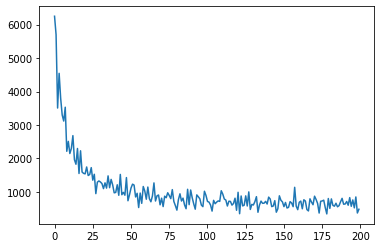

In [7]:
plt.plot(losses[:200])
plt.show()